In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma, norm
import diptest

In [110]:
## Generate a compound poisson process, of intensity mu with num_event event. 
def generate_poisson_process(mu, num_events):
    time_intervals = -np.log(np.random.random(num_events)) / mu
    total_events = time_intervals.cumsum()
    events = pd.DataFrame(np.ones(num_events), index=total_events)
    events[0] = events[0].cumsum()
    return events


No handles with labels found to put in legend.


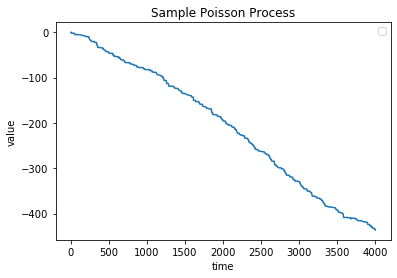

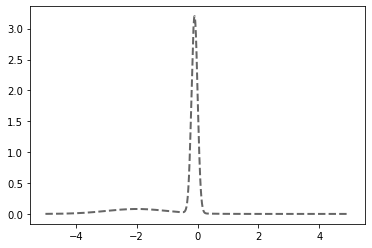

In [111]:
parameters = np.array([[-2, 1],
                        [-0.1,  0.1]])
weights = np.array([0.2, 0.8])
                   
def generate_cpp(mu, timeMAX):
    size_time = 1000 +1
        
    time_space = np.linspace(0, timeMAX, size_time)
    dt = time_space[1]-time_space[0]
    
    number_jump = poisson.rvs(mu * dt, size=size_time-1)
    #print(number_jump)
    process = np.zeros(size_time)
    
    for i in range(size_time-1):
        mixture = np.random.choice(len(weights), size = number_jump[i], replace=True, p = weights)
        aux = np.array([norm.rvs(*(parameters[j])) for j in mixture])
        #aux = np.array([gamma.rvs(3, size=number_jump[i])])
        process[i+1] = process[i] + np.sum(aux)
    #return (time_space, process + norm.rvs(0,0.5, size_time))
    return (time_space, process )
    
time, process = generate_cpp(1/4, 4000)
#plt.plot(time, process, marker='.', linestyle='none')
plt.plot(time, process)
plt.title("Sample Poisson Process")
plt.xlabel("time")
plt.ylabel("value")
plt.legend()
plt.show()

x = np.linspace(-5,5, 1000)
f = np.zeros_like(x)
for (l, s), w in zip(parameters , weights):
    f += norm.pdf(x, loc=l, scale=s) * w
plt.plot(x, f,  'k--', lw=2, alpha=0.6, label='Densité réelle')
plt.show()

No handles with labels found to put in legend.


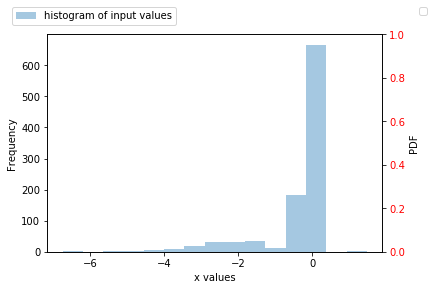

In [112]:
def plotHistogramAndPdf(data):
    x = np.linspace(np.min(data),np.max(data), len(data)-1)
    ax = plt.gca()
    plt.hist(data, bins = 15, alpha = 0.4, label = 'histogram of input values');
    plt.ylabel('Frequency')
    plt.xlabel('x values')
    ax2 = ax.twinx()
    #plt.plot(x, pdf, c = 'red', label = 'probability density function');
    plt.ylabel('PDF')
    [tl.set_color('r') for tl in ax2.get_yticklabels()]
    ax.legend(bbox_to_anchor=(0.4, 1.15))
    ax2.legend(bbox_to_anchor=(1.15,1.15))

process = process +  norm.rvs(0, 0.0, 1001)
data = [process[i+1]-process[i] for i in range(len(process)-1)]
x = np.linspace(np.min(data),np.max(data), 1000)

plotHistogramAndPdf(data)

## Application of the dip test

In [113]:
# both the dip statistic and p-value
data = np.array(data)
dip, pval = diptest.diptest(data)

print("p-value : Reject 1 mod", 1-pval)

p-value : Reject 1 mod 0.41765490285064544


# Fonction of the rate of mutation

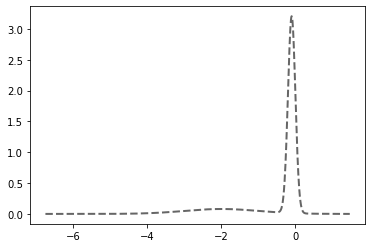

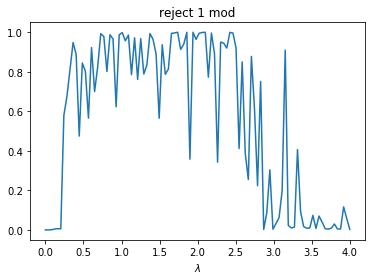

In [115]:
def pvalue(rate, nlevel):
    time, process = generate_cpp(rate, 4000)
    process = process + norm.rvs(0, nlevel, 1001)
    data = [process[i+1]-process[i] for i in range(len(process)-1)]
    x = np.linspace(np.min(data),np.max(data), 1000)
    data = np.array(data)
    dip, pval = diptest.diptest(data)
    return pval

x = np.linspace(np.min(data),np.max(data), 1000)
f = np.zeros_like(x)
for (l, s), w in zip(parameters , weights):
    f += norm.pdf(x, loc=l, scale=s) * w
plt.plot(x, f,  'k--', lw=2, alpha=0.6, label='Densité réelle')
plt.show()

lamb = np.linspace(0,4,100)
plamb = [1-pvalue(l, 0.0) for l in lamb]
plt.plot(lamb, plamb)
plt.xlabel('$\lambda$')
plt.title("reject 1 mod")
plt.show()

# eps = np.linspace(0,1,100)
# peps = [1-pvalue(1, p) for p in eps]
# plt.plot(eps, peps)
# plt.xlabel('$\sigma_\epsilon$')
# plt.title("reject 1 mod")
# plt.show()




    
    

In [106]:
norm.rvs(0, 0, 1001)

array([0., 0., 0., ..., 0., 0., 0.])